Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Skripsi/bismillah skripsi/data.csv", delimiter=';')
#df = pd.read_csv("data.csv", delimiter=';')
df

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2015,NaN,NaN,"27,7",82.0,NaN,NaN,7.0,240.0,3.0,W
1,02-01-2015,NaN,"31,8","27,9",83.0,8888,"4,2",7.0,260.0,3.0,W
2,03-01-2015,NaN,NaN,"27,5",80.0,"0,8",NaN,5.0,250.0,2.0,W
3,04-01-2015,25,"30,4","27,3",82.0,"4,2",NaN,6.0,230.0,2.0,N
4,05-01-2015,24,"31,7","27,7",80.0,8888,NaN,4.0,200.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...
3131,27-07-2023,"21,2","32,6","24,4",82.0,0,10,4.0,130.0,2.0,SE
3132,28-07-2023,22,"28,4","24,8",78.0,NaN,10,5.0,130.0,2.0,SE
3133,29-07-2023,"22,8","28,4","24,9",82.0,0,10,5.0,120.0,3.0,SE
3134,30-07-2023,"23,2","28,2","25,6",78.0,NaN,"7,4",6.0,120.0,4.0,SE


Rename Kolom

In [ ]:
df.rename(columns={'Tn': 'TempMin', 'Tx': 'TempMax', 'Tavg': 'TemptAvg',
                   'RH_avg': 'HumAvg', 'RR': 'Rainfall', 'ss': 'Sunshine',
                   'ff_x': 'WindMax', 'ddd_x': 'WindDir', 'ff_avg': 'WindAvg',
                   'ddd_car': 'MostWindDir'}, inplace=True)
df

,Tanggal,TempMin,TempMax,TemptAvg,HumAvg,Rainfall,Sunshine,WindMax,WindDir,WindAvg,MostWindDir
0,01-01-2015,NaN,NaN,"27,7",82.0,NaN,NaN,7.0,240.0,3.0,W
1,02-01-2015,NaN,"31,8","27,9",83.0,8888,"4,2",7.0,260.0,3.0,W
2,03-01-2015,NaN,NaN,"27,5",80.0,"0,8",NaN,5.0,250.0,2.0,W
3,04-01-2015,25,"30,4","27,3",82.0,"4,2",NaN,6.0,230.0,2.0,N
4,05-01-2015,24,"31,7","27,7",80.0,8888,NaN,4.0,200.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...
3131,27-07-2023,"21,2","32,6","24,4",82.0,0,10,4.0,130.0,2.0,SE
3132,28-07-2023,22,"28,4","24,8",78.0,NaN,10,5.0,130.0,2.0,SE
3133,29-07-2023,"22,8","28,4","24,9",82.0,0,10,5.0,120.0,3.0,SE
3134,30-07-2023,"23,2","28,2","25,6",78.0,NaN,"7,4",6.0,120.0,4.0,SE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      3136 non-null   object 
 1   TempMin      2664 non-null   object 
 2   TempMax      2895 non-null   object 
 3   TemptAvg     3068 non-null   object 
 4   HumAvg       3063 non-null   float64
 5   Rainfall     2158 non-null   object 
 6   Sunshine     2869 non-null   object 
 7   WindMax      3104 non-null   float64
 8   WindDir      3104 non-null   float64
 9   WindAvg      3104 non-null   float64
 10  MostWindDir  3104 non-null   object 
dtypes: float64(4), object(7)
memory usage: 269.6+ KB


In [ ]:
df.shape

(3136, 11)

In [ ]:
df['TempMin'] = df['TempMin'].str.replace(',', '.').astype(float)
df['TempMax'] = df['TempMax'].str.replace(',', '.').astype(float)
df['TemptAvg'] = df['TemptAvg'].str.replace(',', '.').astype(float)
df['Rainfall'] = df['Rainfall'].str.replace(',', '.').astype(float)
df['Sunshine'] = df['Sunshine'].str.replace(',', '.').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      3136 non-null   object 
 1   TempMin      2664 non-null   float64
 2   TempMax      2895 non-null   float64
 3   TemptAvg     3068 non-null   float64
 4   HumAvg       3063 non-null   float64
 5   Rainfall     2158 non-null   float64
 6   Sunshine     2869 non-null   float64
 7   WindMax      3104 non-null   float64
 8   WindDir      3104 non-null   float64
 9   WindAvg      3104 non-null   float64
 10  MostWindDir  3104 non-null   object 
dtypes: float64(9), object(2)
memory usage: 269.6+ KB


Missing Value

In [ ]:
df.isnull().sum()

Tanggal          0
TempMin        472
TempMax        241
TemptAvg        68
HumAvg          73
Rainfall       978
Sunshine       267
WindMax         32
WindDir         32
WindAvg         32
MostWindDir     32
dtype: int64

In [ ]:
df.dropna(subset=['Rainfall'], inplace=True)
#df['Rainfall'].interpolate(method='linear', inplace=True)

In [ ]:
df['TempMin'].interpolate(method='linear', inplace=True)
df['TempMax'].interpolate(method='linear', inplace=True)
df['TemptAvg'].interpolate(method='linear', inplace=True)
df['HumAvg'].interpolate(method='linear', inplace=True)
df['Sunshine'].interpolate(method='linear', inplace=True)
df['WindMax'].interpolate(method='linear', inplace=True)
df['WindDir'].interpolate(method='linear', inplace=True)
df['WindAvg'].interpolate(method='linear', inplace=True)

In [ ]:
df.isnull().sum()

Tanggal        0
TempMin        2
TempMax        0
TemptAvg       0
HumAvg         0
Rainfall       0
Sunshine       0
WindMax        0
WindDir        0
WindAvg        0
MostWindDir    0
dtype: int64

In [ ]:
#filtered_data = df[df['Rainfall'] >= 300]
#rainfall_8888 = filtered_data['Rainfall']
#jumlah = len(rainfall_8888)
#jumlah

In [ ]:
#df.loc[df['Rainfall'] == 8888, 'Rainfall'] = 0

In [ ]:
#inter_rainfall = df['Rainfall'].interpolate(method='linear', inplace=True)  # Mengambil nilai inter
#df['Rainfall'].replace(8888, inter_rainfall, inplace=True)

df['Rainfall'].replace(8888, method='pad', inplace=True)

In [ ]:
df

,Tanggal,TempMin,TempMax,TemptAvg,HumAvg,Rainfall,Sunshine,WindMax,WindDir,WindAvg,MostWindDir
1,02-01-2015,NaN,31.8,27.9,83.0,8888.0,4.20,7.0,260.0,3.0,W
2,03-01-2015,NaN,31.1,27.5,80.0,0.8,5.28,5.0,250.0,2.0,W
3,04-01-2015,25.0,30.4,27.3,82.0,4.2,6.36,6.0,230.0,2.0,N
4,05-01-2015,24.0,31.7,27.7,80.0,4.2,7.44,4.0,200.0,1.0,N
6,07-01-2015,25.0,32.2,28.2,79.0,2.7,8.52,6.0,230.0,2.0,N
...,...,...,...,...,...,...,...,...,...,...,...
3128,24-07-2023,24.4,28.2,25.3,88.0,0.0,10.00,3.0,130.0,2.0,SE
3130,26-07-2023,23.0,28.5,25.2,83.0,0.0,6.30,5.0,120.0,3.0,SE
3131,27-07-2023,21.2,32.6,24.4,82.0,0.0,10.00,4.0,130.0,2.0,SE
3133,29-07-2023,22.8,28.4,24.9,82.0,0.0,10.00,5.0,120.0,3.0,SE


In [ ]:
#df.dropna(subset=['TempMin'], inplace=True)
#df.dropna(subset=['TempMax'], inplace=True)
#df.dropna(subset=['Rainfall'], inplace=True)
#df.dropna(subset=['Sunshine'], inplace=True)


In [ ]:
df.isnull().sum()

Tanggal        0
TempMin        0
TempMax        0
TemptAvg       0
HumAvg         0
Rainfall       0
Sunshine       0
WindMax        0
WindDir        0
WindAvg        0
MostWindDir    0
dtype: int64

In [ ]:
filtered_data = df[df['Rainfall'] == 8888.0]
rainfall_8888 = filtered_data['Rainfall']
jumlah = len(rainfall_8888)
jumlah

0

In [ ]:
filtered_data = df[df['Rainfall'] == 0]
rainfall_0 = filtered_data['Rainfall']
jumlah = len(rainfall_0)
jumlah

463

In [ ]:
#df.dropna(subset=['Rainfall','TempMin','TempMax','TemptAvg','HumAvg','Sunshine','WindMax','WindDir','Rainfall','MostWindDir'], inplace=True)

In [ ]:
#mean_values = df.mean()
#df.fillna(mean_values, inplace=True)

In [ ]:
#df.isnull().sum()
#df.drop(['TempMin','TempMax','WindMax'], axis=1, inplace=True)

In [ ]:
df

,Tanggal,TempMin,TempMax,TemptAvg,HumAvg,Rainfall,Sunshine,WindMax,WindDir,WindAvg,MostWindDir
3,04-01-2015,25.0,30.4,27.3,82.0,4.2,6.36,6.0,230.0,2.0,N
4,05-01-2015,24.0,31.7,27.7,80.0,4.2,7.44,4.0,200.0,1.0,N
6,07-01-2015,25.0,32.2,28.2,79.0,2.7,8.52,6.0,230.0,2.0,N
10,11-01-2015,26.0,33.0,28.8,76.0,0.0,9.60,11.0,240.0,4.0,SW
12,13-01-2015,24.0,31.5,25.9,91.0,10.6,5.95,5.0,240.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...
3128,24-07-2023,24.4,28.2,25.3,88.0,0.0,10.00,3.0,130.0,2.0,SE
3130,26-07-2023,23.0,28.5,25.2,83.0,0.0,6.30,5.0,120.0,3.0,SE
3131,27-07-2023,21.2,32.6,24.4,82.0,0.0,10.00,4.0,130.0,2.0,SE
3133,29-07-2023,22.8,28.4,24.9,82.0,0.0,10.00,5.0,120.0,3.0,SE


In [ ]:
df.drop(['MostWindDir','Tanggal'], axis=1, inplace=True)
df

,TempMin,TempMax,TemptAvg,HumAvg,Rainfall,Sunshine,WindMax,WindDir,WindAvg
3,25.0,30.4,27.3,82.0,4.2,6.36,6.0,230.0,2.0
4,24.0,31.7,27.7,80.0,4.2,7.44,4.0,200.0,1.0
6,25.0,32.2,28.2,79.0,2.7,8.52,6.0,230.0,2.0
10,26.0,33.0,28.8,76.0,0.0,9.60,11.0,240.0,4.0
12,24.0,31.5,25.9,91.0,10.6,5.95,5.0,240.0,0.0
...,...,...,...,...,...,...,...,...,...
3128,24.4,28.2,25.3,88.0,0.0,10.00,3.0,130.0,2.0
3130,23.0,28.5,25.2,83.0,0.0,6.30,5.0,120.0,3.0
3131,21.2,32.6,24.4,82.0,0.0,10.00,4.0,130.0,2.0
3133,22.8,28.4,24.9,82.0,0.0,10.00,5.0,120.0,3.0


In [ ]:
df.describe()


,TempMin,TempMax,TemptAvg,HumAvg,Rainfall,Sunshine,WindMax,WindDir,WindAvg
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,24.772588,31.229151,27.301322,83.961503,13.379870,5.880714,4.637755,170.160946,1.839054
std,0.878458,8.941674,0.959749,3.483658,24.183504,3.900871,1.648466,65.815545,0.975608
min,20.000000,3.600000,23.500000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,24.000000,30.000000,26.800000,82.000000,0.200000,3.500000,4.000000,120.000000,1.000000
50%,25.000000,31.200000,27.400000,84.000000,3.400000,6.200000,4.000000,140.000000,2.000000
75%,25.200000,32.000000,28.000000,86.000000,15.525000,8.300000,5.000000,220.000000,2.000000
max,27.000000,330.000000,30.000000,97.000000,356.000000,99.000000,21.000000,360.000000,6.000000


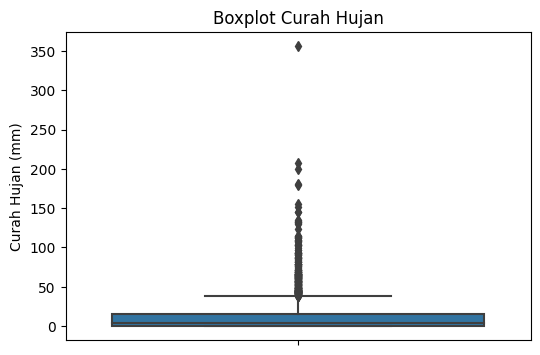

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Jika belum terinstall, install dengan "pip install seaborn"

# Misalnya, curah_hujan merupakan kolom data curah hujan dalam DataFrame
# Gantilah nama variabel dan DataFrame sesuai dengan data yang Anda miliki
plot = df['Rainfall']

# Menggunakan seaborn untuk membuat boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=plot)
plt.title('Boxplot Curah Hujan')
plt.ylabel('Curah Hujan (mm)')
plt.show()


Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
kolom_numerik = df.select_dtypes(include=['float'])
scaled_data = scaler.fit_transform(kolom_numerik)
df = pd.DataFrame(scaled_data, columns=kolom_numerik.columns)
df[kolom_numerik.columns] = df

In [ ]:
df

,TempMin,TempMax,TemptAvg,HumAvg,Rainfall,Sunshine,WindMax,WindDir,WindAvg
0,0.714286,0.082108,0.584615,0.40,0.011798,0.064242,0.25,0.638889,0.333333
1,0.571429,0.086091,0.646154,0.32,0.011798,0.075152,0.15,0.555556,0.166667
2,0.714286,0.087623,0.723077,0.28,0.007584,0.086061,0.25,0.638889,0.333333
3,0.857143,0.090074,0.815385,0.16,0.000000,0.096970,0.50,0.666667,0.666667
4,0.571429,0.085478,0.369231,0.76,0.029775,0.060101,0.20,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...
2151,0.628571,0.075368,0.276923,0.64,0.000000,0.101010,0.10,0.361111,0.333333
2152,0.428571,0.076287,0.261538,0.44,0.000000,0.063636,0.20,0.333333,0.500000
2153,0.171429,0.088848,0.138462,0.40,0.000000,0.101010,0.15,0.361111,0.333333
2154,0.400000,0.075980,0.215385,0.40,0.000000,0.101010,0.20,0.333333,0.500000


In [ ]:
cols = ['Rainfall','TempMin','TempMax','TemptAvg','HumAvg','Sunshine','WindMax','WindDir','WindAvg']
#cols = ['Rainfall','TemptAvg','HumAvg','Sunshine','WindDir','WindAvg']
new_data = df[cols]
new_data.head()

,Rainfall,TempMin,TempMax,TemptAvg,HumAvg,Sunshine,WindMax,WindDir,WindAvg
0,0.011798,0.714286,0.082108,0.584615,0.40,0.064242,0.25,0.638889,0.333333
1,0.011798,0.571429,0.086091,0.646154,0.32,0.075152,0.15,0.555556,0.166667
2,0.007584,0.714286,0.087623,0.723077,0.28,0.086061,0.25,0.638889,0.333333
3,0.000000,0.857143,0.090074,0.815385,0.16,0.096970,0.50,0.666667,0.666667
4,0.029775,0.571429,0.085478,0.369231,0.76,0.060101,0.20,0.666667,0.000000


<Axes: >

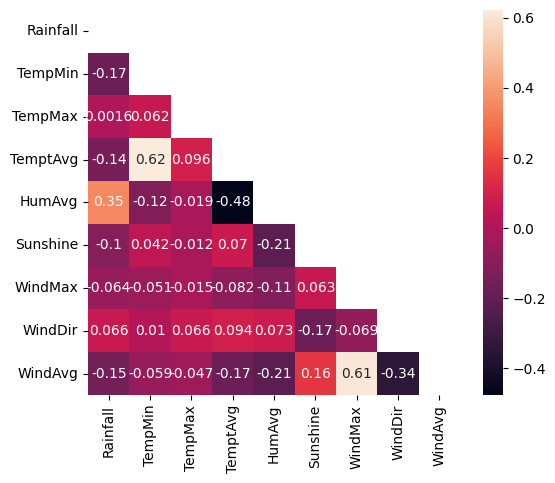

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

In [ ]:
y = df['Rainfall'] # variabel dependent atau target
X = df.drop(['Rainfall'], axis=1) # variabel independen atau fitur input

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0 )

In [ ]:
len(X_train)

1724

In [ ]:
len(X_test)

432

In [ ]:
#Simulasi SVM dengan kernel berbeda

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

kernel_svr = ['linear', 'poly', 'rbf', 'sigmoid']
for krl in kernel_svr :
  # model svr
  svr_model = SVR(C=1.0, epsilon=0.01, kernel=krl)

  # Fit model pada data training
  svr_model.fit(X_train, y_train)

  # Prediksi pada data uji
  predictions = svr_model.predict(X_test)

  mse = mean_squared_error(y_test, predictions)
  mae = mean_absolute_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)

  # Menampilkan hasil
  print("\nKernel :", krl)
  print("-----------------------------")
  print("Mean Squared Error (MSE):", "%0.4f" % mse)
  print("Mean Absolute Error (MAE):", "%0.4f" % mae)
  print("R-squared:", "%0.4f" % r2)


Kernel : linear
-----------------------------
Mean Squared Error (MSE): 0.0045
Mean Absolute Error (MAE): 0.0336
R-squared: 0.0269

Kernel : poly
-----------------------------
Mean Squared Error (MSE): 0.0038
Mean Absolute Error (MAE): 0.0315
R-squared: 0.1712

Kernel : rbf
-----------------------------
Mean Squared Error (MSE): 0.0037
Mean Absolute Error (MAE): 0.0316
R-squared: 0.1806

Kernel : sigmoid
-----------------------------
Mean Squared Error (MSE): 24.4673
Mean Absolute Error (MAE): 3.2245
R-squared: -5347.3362


In [ ]:
#Simulasi SVM dengan epsilon berbeda

eps_svr = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
for eps in eps_svr :
  # model svr
  svr_model = SVR(C=1.0, epsilon=eps, kernel='rbf')

  # Fit model pada data training
  svr_model.fit(X_train, y_train)

  # Prediksi pada data uji
  predictions = svr_model.predict(X_test)

  mse = mean_squared_error(y_test, predictions)
  mae = mean_absolute_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)

  # Menampilkan hasil
  print("\nEpsilon:", eps)
  print("-----------------------------")
  print("Mean Squared Error (MSE):", "%0.4f" % mse)
  print("Mean Absolute Error (MAE):", "%0.4f" % mae)
  print("R-squared:", "%0.4f" % r2)


Epsilon: 0.5
-----------------------------
Mean Squared Error (MSE): 0.2179
Mean Absolute Error (MAE): 0.4621
R-squared: -46.6203

Epsilon: 0.1
-----------------------------
Mean Squared Error (MSE): 0.0069
Mean Absolute Error (MAE): 0.0733
R-squared: -0.5014

Epsilon: 0.05
-----------------------------
Mean Squared Error (MSE): 0.0040
Mean Absolute Error (MAE): 0.0452
R-squared: 0.1271

Epsilon: 0.01
-----------------------------
Mean Squared Error (MSE): 0.0037
Mean Absolute Error (MAE): 0.0316
R-squared: 0.1806

Epsilon: 0.005
-----------------------------
Mean Squared Error (MSE): 0.0038
Mean Absolute Error (MAE): 0.0312
R-squared: 0.1715

Epsilon: 0.001
-----------------------------
Mean Squared Error (MSE): 0.0038
Mean Absolute Error (MAE): 0.0310
R-squared: 0.1630


In [ ]:
#Simulasi SVM dengan nilai C berbeda

c_svr = [20, 15, 10, 5, 1, 0.1, 0.01, 0.001]
for c_val in c_svr :
  # model svr
  svr_model = SVR(C=c_val, epsilon=0.01, kernel='rbf')

  # Fit model pada data training
  svr_model.fit(X_train, y_train)

  # Prediksi pada data uji
  predictions = svr_model.predict(X_test)

  mse = mean_squared_error(y_test, predictions)
  mae = mean_absolute_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)

  # Menampilkan hasil
  print("\nNilai C:", c_val)
  print("-----------------------------")
  print("Mean Squared Error (MSE):", "%0.4f" % mse)
  print("Mean Absolute Error (MAE):", "%0.4f" % mae)
  print("R-squared:", "%0.4f" % r2)


Nilai C: 20
-----------------------------
Mean Squared Error (MSE): 0.0037
Mean Absolute Error (MAE): 0.0329
R-squared: 0.1980

Nilai C: 15
-----------------------------
Mean Squared Error (MSE): 0.0036
Mean Absolute Error (MAE): 0.0327
R-squared: 0.2035

Nilai C: 10
-----------------------------
Mean Squared Error (MSE): 0.0036
Mean Absolute Error (MAE): 0.0324
R-squared: 0.2113

Nilai C: 5
-----------------------------
Mean Squared Error (MSE): 0.0036
Mean Absolute Error (MAE): 0.0320
R-squared: 0.2026

Nilai C: 1
-----------------------------
Mean Squared Error (MSE): 0.0037
Mean Absolute Error (MAE): 0.0316
R-squared: 0.1806

Nilai C: 0.1
-----------------------------
Mean Squared Error (MSE): 0.0039
Mean Absolute Error (MAE): 0.0317
R-squared: 0.1459

Nilai C: 0.01
-----------------------------
Mean Squared Error (MSE): 0.0042
Mean Absolute Error (MAE): 0.0323
R-squared: 0.0804

Nilai C: 0.001
-----------------------------
Mean Squared Error (MSE): 0.0046
Mean Absolute Error (MAE

In [ ]:
X_test

,TempMin,TempMax,TemptAvg,HumAvg,Sunshine,WindMax,WindDir,WindAvg
579,0.714286,0.085172,0.676923,0.52,0.031313,0.15,0.361111,0.333333
1212,0.928571,0.087010,0.800000,0.52,0.072727,0.20,0.333333,0.166667
1049,0.285714,0.076900,0.323077,0.40,0.080808,0.15,0.388889,0.333333
1982,0.614286,0.085784,0.523077,0.48,0.025253,0.15,0.722222,0.166667
1296,0.657143,0.079963,0.492308,0.40,0.060606,0.15,0.333333,0.500000
...,...,...,...,...,...,...,...,...
616,0.428571,0.081495,0.507692,0.56,0.071717,0.25,0.277778,0.500000
893,0.714286,0.078738,0.661538,0.52,0.020202,0.20,0.250000,0.333333
425,0.714286,0.081495,0.569231,0.68,0.060606,0.15,0.777778,0.166667
2133,0.600000,0.079963,0.538462,0.52,0.050505,0.15,0.333333,0.333333


Evalusi dengan Parameter Terbaik
-----------------------------
Mean Squared Error (MSE): 0.0036
Mean Absolute Error (MAE): 0.0324
R-squared: 0.2113 



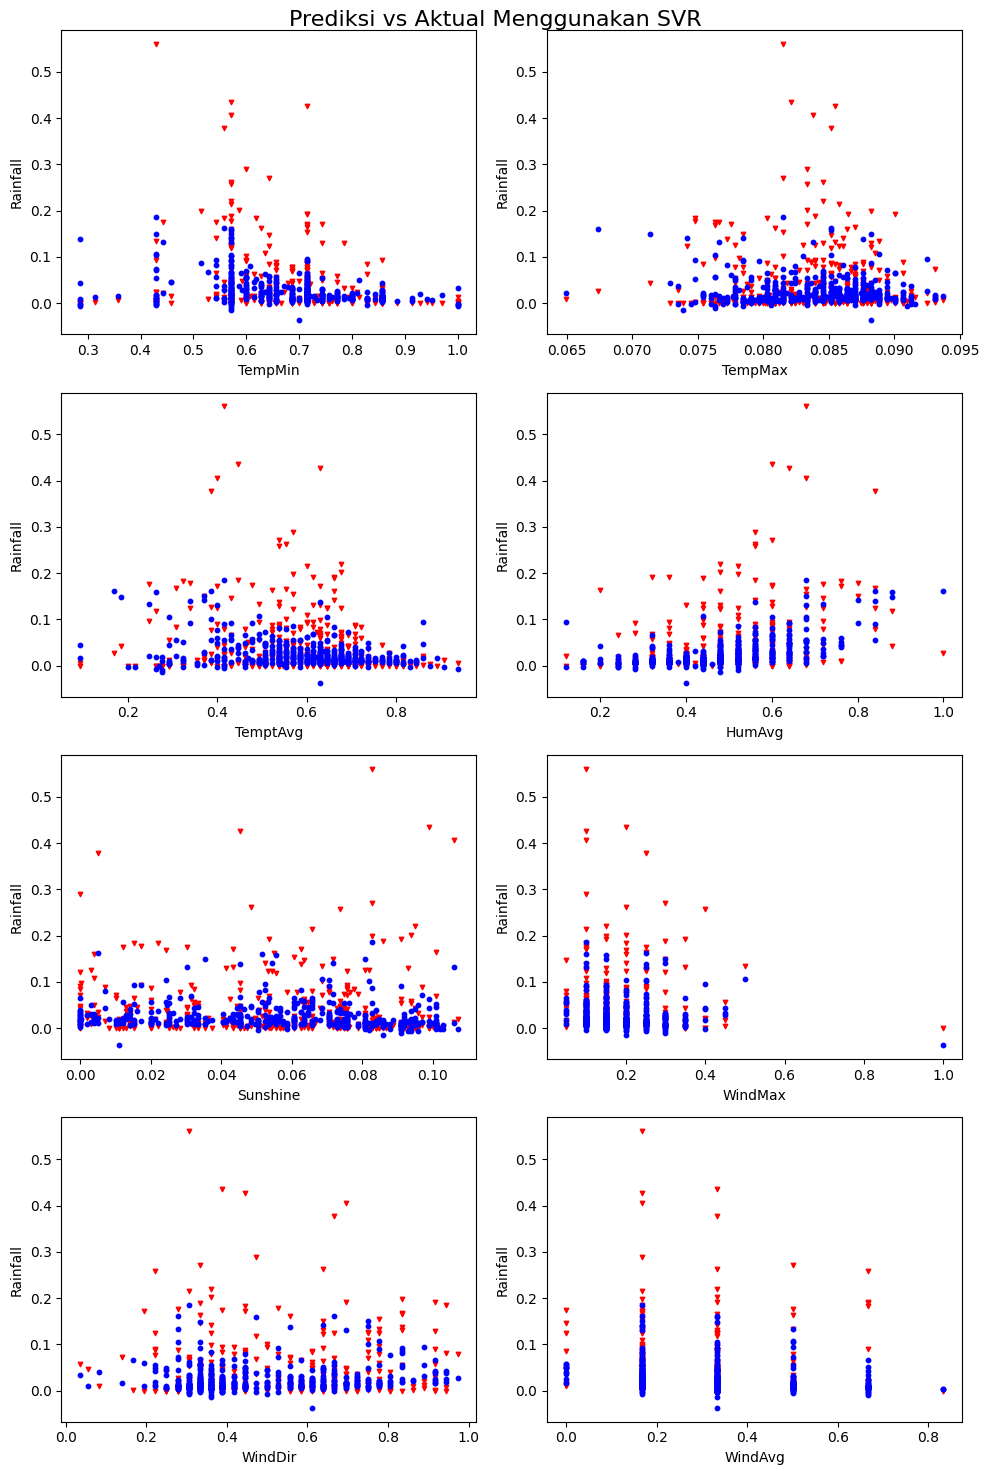

In [ ]:
#Aplikasi parameter terbaik (=10, epsilon=0.01, kernel='rbf')
svr_model = SVR(C=10, epsilon=0.01, kernel='rbf')

# Fit model pada data training
svr_model.fit(X_train, y_train)

# Prediksi pada data uji
predictions = svr_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Menampilkan hasil
print("Evalusi dengan Parameter Terbaik")
print("-----------------------------")
print("Mean Squared Error (MSE):", "%0.4f" % mse)
print("Mean Absolute Error (MAE):", "%0.4f" % mae)
print("R-squared:", "%0.4f" % r2 ,"\n")

#Visualisasi
import matplotlib.pyplot as plt

feature = X_test.columns.values.tolist()
idx =0
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
fig.suptitle('Prediksi vs Aktual Menggunakan SVR', fontsize=16)
for i in range (4):
  for j in range (2):
    data = X_test[feature[idx]]
    axs[i, j].scatter(data, y_test, color = 'red', s=10, marker="v")
    axs[i, j].scatter(data,svr_model.predict(X_test), color = 'blue', s=10)
    axs[i, j].set_xlabel(feature[idx])
    axs[i, j].set_ylabel('Rainfall')
    idx = idx+1

fig.tight_layout()
plt.show()


In [ ]:
#Standar Linear regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inisialisasi model Regresi Linear Berganda
model1 = LinearRegression()

# Latih model pada data latih
model1.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model1.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Menghitung RMSE
mae = mean_absolute_error(y_test, y_pred)  # Menghitung MAE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:","%0.4f" % mse)
print("Mean Absolute Error:", "%0.4f" % mae)
print("R-squared:", "%0.4f" % r2)


Mean Squared Error: 0.0038
Mean Absolute Error: 0.0383
R-squared: 0.1637


In [ ]:
#Transform data
from sklearn.preprocessing import PolynomialFeatures

# Transformasi fitur input menjadi fitur polinomial
degree = [1,2,3,4]
for d in degree:
  poly_features = PolynomialFeatures(degree=d)
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.transform(X_test)

  # Inisialisasi model regresi linear
  model = LinearRegression()

  # Latih model pada data latih yang sudah diubah menjadi fitur polinomial
  model.fit(X_train_poly, y_train)

  # Lakukan prediksi pada data uji yang sudah diubah menjadi fitur polinomial
  y_pred = model.predict(X_test_poly)

  # Evaluasi model
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print("\nDegree :", d)
  print("----------------------------")
  print("Mean Squared Error:","%0.4f" % mse)
  print("Mean Absolute Error:", "%0.4f" % mae)
  print("R-squared:", "%0.4f" % r2)



Degree : 1
----------------------------
Mean Squared Error: 0.0038
Mean Absolute Error: 0.0383
R-squared: 0.1637

Degree : 2
----------------------------
Mean Squared Error: 0.0035
Mean Absolute Error: 0.0356
R-squared: 0.2300

Degree : 3
----------------------------
Mean Squared Error: 0.0067
Mean Absolute Error: 0.0389
R-squared: -0.4672

Degree : 4
----------------------------
Mean Squared Error: 0.0185
Mean Absolute Error: 0.0626
R-squared: -3.0415



Linear Regression dengan Feature Polynomial
----------------------------
Mean Squared Error: 0.0035
Mean Absolute Error: 0.0356
R-squared: 0.2300


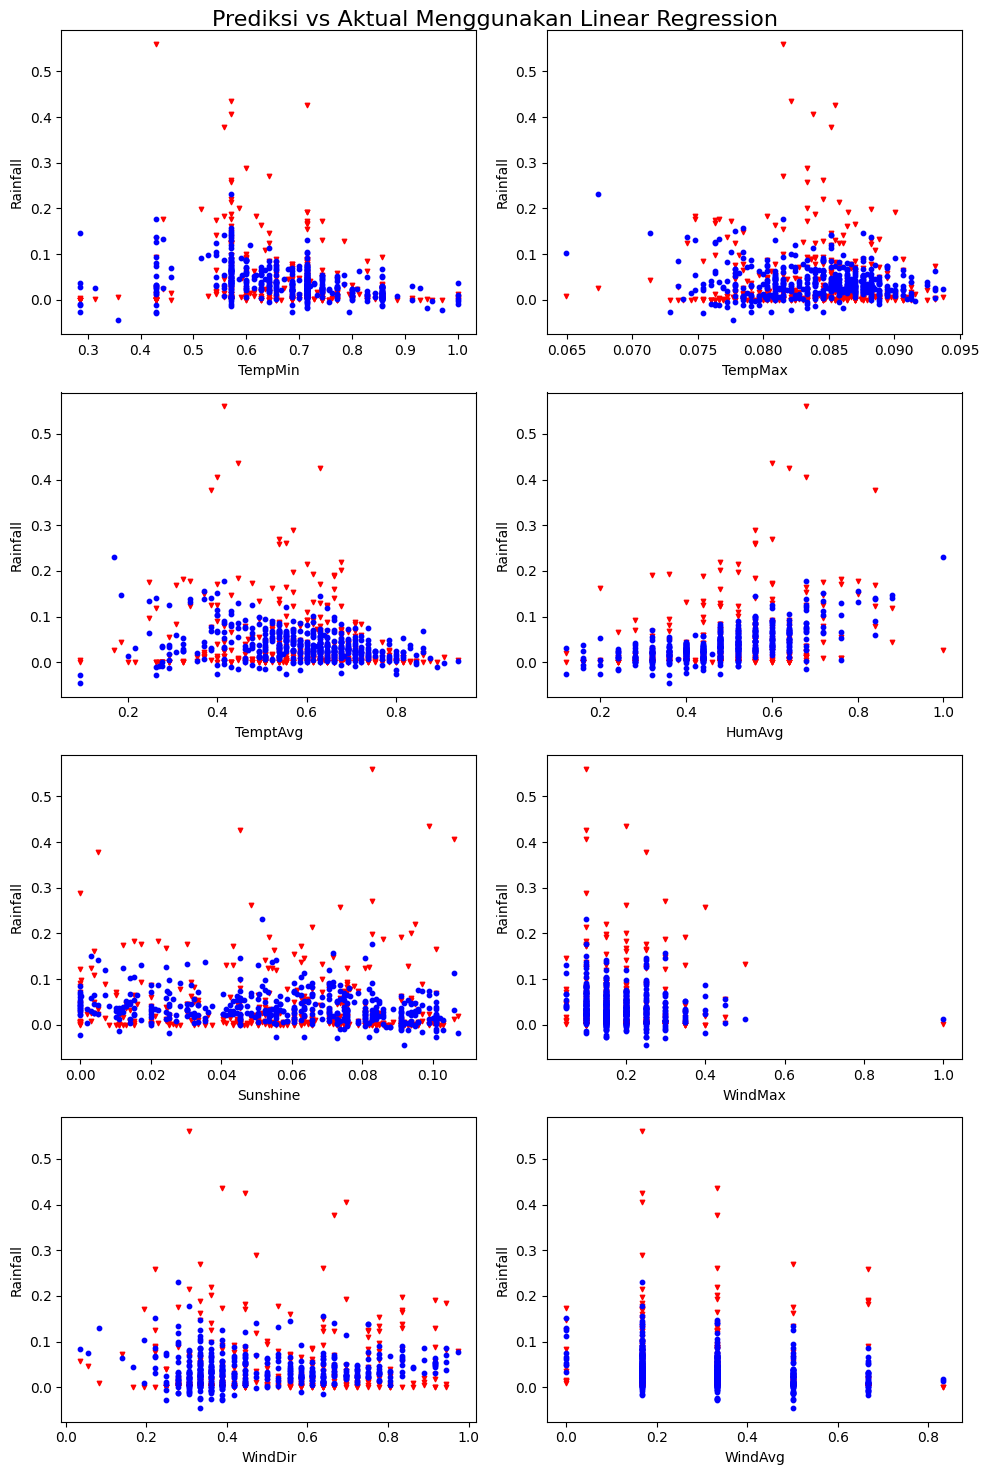

In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model pada data latih yang sudah diubah menjadi fitur polinomial
model.fit(X_train_poly, y_train)

# Lakukan prediksi pada data uji yang sudah diubah menjadi fitur polinomial
y_pred = model.predict(X_test_poly)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression dengan Feature Polynomial")
print("----------------------------")
print("Mean Squared Error:","%0.4f" % mse)
print("Mean Absolute Error:", "%0.4f" % mae)
print("R-squared:", "%0.4f" % r2)

#Visualisasi
feature = X_test.columns.values.tolist()
idx = 0
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
fig.suptitle('Prediksi vs Aktual Menggunakan Linear Regression', fontsize=16)
for i in range (4) :
  for j in range (2):
    data = X_test[feature[idx]]
    axs[i, j].scatter(data, y_test, color = 'red', s=10, marker='v')
    axs[i, j].scatter(data, model.predict(X_test_poly), color = 'blue', s=10)
    axs[i, j].set_xlabel(feature[idx])
    axs[i, j].set_ylabel('Rainfall')
    idx = idx+1

fig.tight_layout()
plt.show()


In [ ]:
print(y_pred[:10])
print(y_test[:10])

[0.02380947 0.03003351 0.00413061 0.01775776 0.00856302 0.01088584
 0.05563019 0.02943546 0.00541705 0.00101954]
579     0.062640
1212    0.000000
1049    0.000000
1982    0.016011
1296    0.000000
805     0.219944
863     0.000281
1818    0.018539
1885    0.089326
914     0.000000
Name: Rainfall, dtype: float64
